<a href="https://colab.research.google.com/github/hngphanminh147/cv/blob/master/thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage 

from google.colab.patches import cv2_imshow

(720, 576)


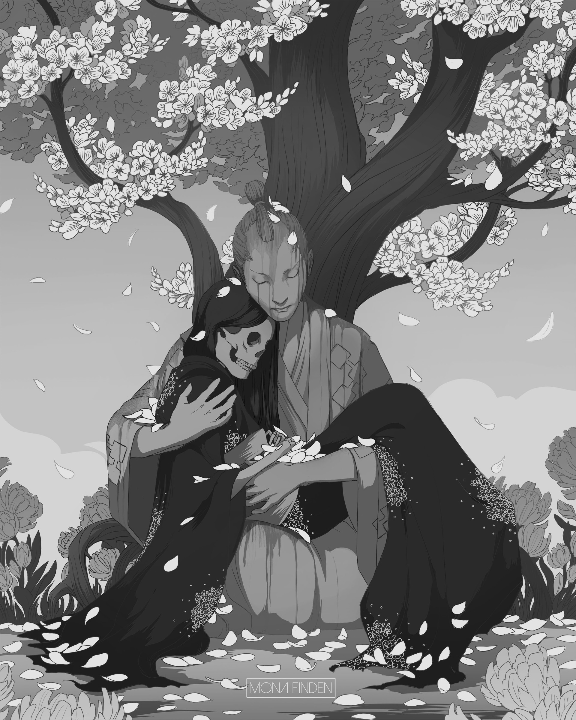

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/mona-finden-lovestory.jpg"
scale = 0.3
img = cv2.imread(path)
img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
# img = cv2.imread(path, flags=cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=((int)(img.shape[1] * scale),(int)(img.shape[0] * scale)))

print(img.shape)
cv2_imshow(img)

In [ ]:
def threshold(img, threshold:int=127, maxVal:int=255):
    re = np.zeros_like(img)
    h, w = img.shape
    for i in range(h):
        for j in range(w):
            re[i, j] = maxVal if (img[i, j] > threshold) else 0
    return re

def gaussian(ksize:int=5, sigma:int=1):
    r = ksize // 2
    x, y = np.mgrid[-r:r + 1, -r:r + 1]
    a = 1.0 / 2 * np.pi * sigma**2
    b = np.exp(-(x**2 + y**2)/(2 * sigma**2))
    return a*b

def gaussian1d(ksize:int=5, sigma:int=1):
    r = ksize // 2
    x = np.asarray()
    a = 1.0 / 2 * np.pi * sigma**2
    b = np.exp(-(x**2 + y**2)/(2 * sigma**2))
    return a*b

def adaptive_mean_threshold(img, maxVal=255, blockSize=3, c=10):
    re = np.zeros_like(img)
    h, w = img.shape
    p = blockSize // 2
    for i in range(p, h - p):
        for j in range(p, w - p):
            try:
                threshold = (img[i - p: i + p, j - p: j + p].mean() - c)
                re[i, j] = maxVal if (img[i, j] > threshold) else 0
            except IndexError as e:
                pass
    return re

def adaptive_gaussian_threshold(img, maxVal=255, blockSize=3, c=10):
    re = np.zeros_like(img)
    h, w = img.shape
    p = blockSize // 2
    k = gaussian(ksize=blockSize)
    k = k/k.sum()

    # threshold mat
    thmat = ndimage.filters.convolve(input=img, weights=k)

    # dest img
    for i in range(p, h - p):
        for j in range(p, w - p):
            try:
                re[i, j] = maxVal if (img[i, j] > thmat[i, j]) else 0
            except IndexError as e:
                pass
    return re

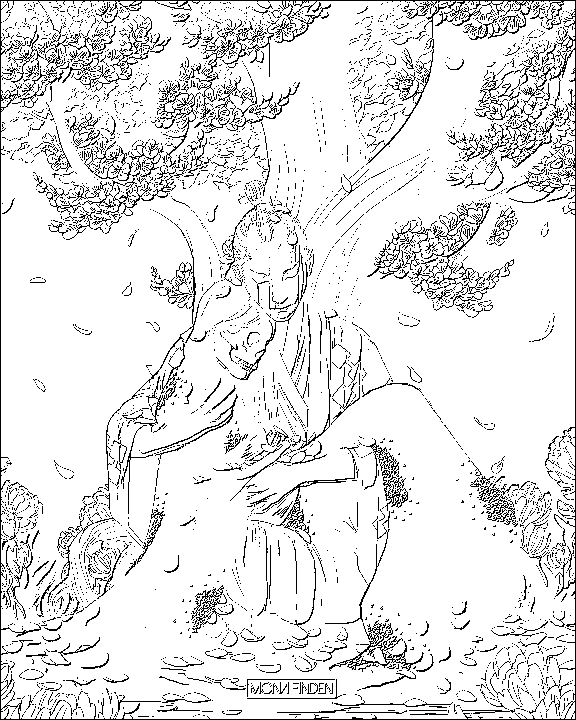

In [ ]:
amt = adaptive_mean_threshold(img)
cv2_imshow(amt)

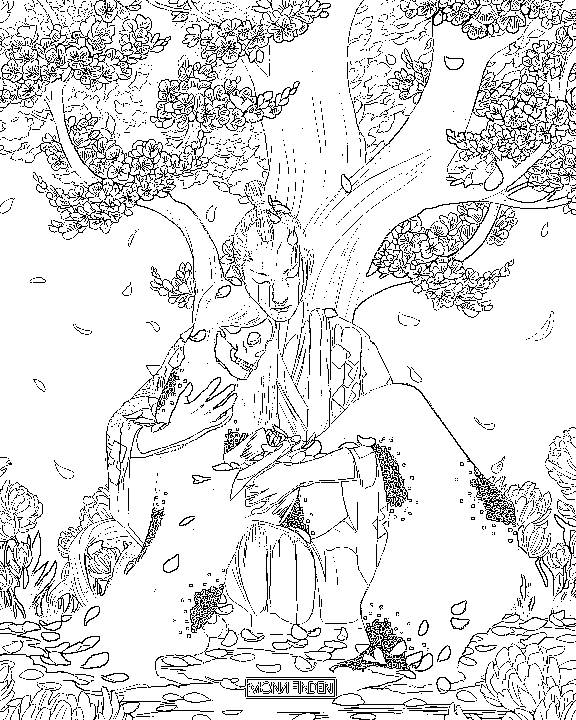

In [ ]:
bamt = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,10)
cv2_imshow(bamt)

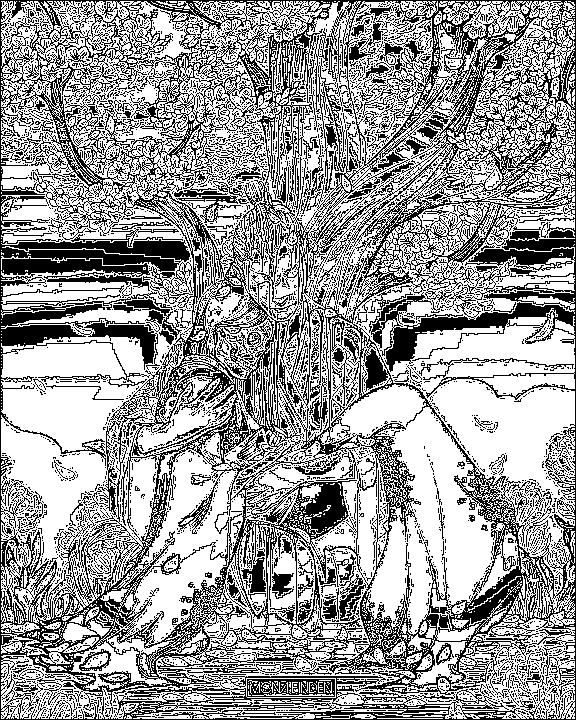

In [ ]:
agt = adaptive_gaussian_threshold(img)
cv2_imshow(agt)

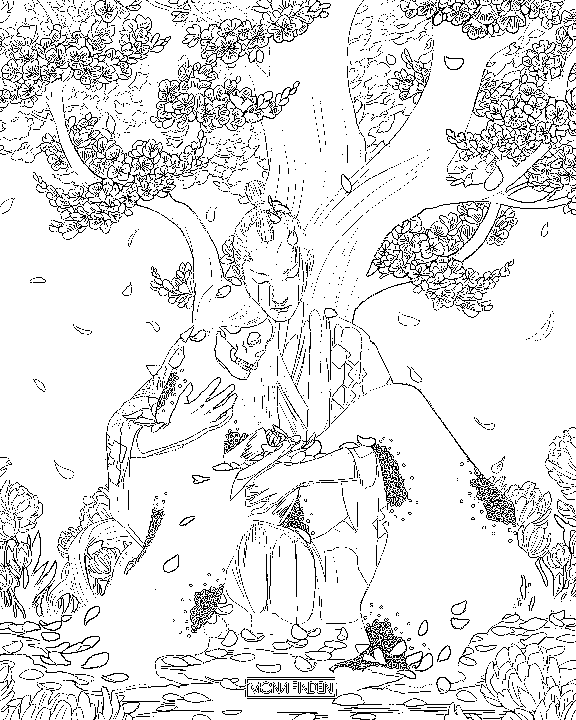

In [ ]:
bagt = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,10)
cv2_imshow(bagt)

In [ ]:
# cv2.getGaussianKernel(ksize=5, sigma=1).sum()


0.9999999999999999